# EDA, FE and Logistic Regression Models (Algerian Forest Fires Dataset)

# 1. EDA and FE
- Data Profiling
- Stastical analysis
- Graphical Analysis
- Data Cleaning
- Data Encoding
- Data Scaling
# 2. Regression Models
- Logistic Regression Model
- Performance metrics for above model
- Creating Imbalanced dataset
- Balancing dataset using imbalanced library
- EDA on balanced dataset
- New Logistic Regression Model for Imbalanced dataset
- Performance metrics for new model
- Performance comparison for both models

# Problem Statement

To predict temperature of region where fire is occuring using Algerian Forest Fire dataset

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Shubham3023/Machine_Learning/main/Algerian%20Forrest%20Fire%20Dataset/Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# 1. Data Cleaning

- Handling null values
- Removing extra whitespaces from features
- Checking and converting the datatypes of feature values
- Encoding categorical features
- Removing rows with no information

In [5]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

We can see white space in column RH and Ws

In [6]:
dataset.columns = [ i.strip() for i in dataset.columns]

In [7]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
dataset['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [9]:
dataset[dataset['day'] == 'Sidi-Bel Abbes Region Dataset']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset.iloc[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [11]:
dataset.drop(index = [122,123], axis = 0, inplace = True)
dataset.reset_index(inplace = True)

In [12]:
dataset.drop('index', axis = 1, inplace = True)

In [13]:
# Creating feature called region 
dataset.loc[:121,'Region'] = 0

In [14]:
dataset.loc[122:, 'Region'] = 1

In [15]:
dataset[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [17]:
dataset.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244.000000
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,NaN
top,17,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Checking unique values in all the features

In [18]:
for feature in dataset.columns:
    print(f'{feature} : {dataset[feature].unique()}')

day : ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
month : ['06' '07' '08' '09']
year : ['2012']
Temperature : ['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
RH : ['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
Ws : ['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']
Rain : ['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
FFMC : ['65.7' '64.4' 

There is whitespace in some of the values of some features 

In [19]:
dataset = dataset.astype(str)

In [20]:
for feature in dataset.columns:
    dataset[feature] = [i.strip() for i in dataset[feature]]

In [21]:
for feature in dataset.columns:
    print(f'{feature} : {dataset[feature].unique()}')

day : ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
month : ['06' '07' '08' '09']
year : ['2012']
Temperature : ['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
RH : ['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
Ws : ['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']
Rain : ['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
FFMC : ['65.7' '64.4' 

All the value inside the features look clean, but there is one value fire in the FWI

In [22]:
dataset[dataset['FWI'] == 'fire']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,nan,1.0


In [23]:
# changing fire value to a float value
dataset.loc[165,'FWI'] = '0.1'

There are some null values inside the Classes column, let's check

In [24]:
dataset['Classes'].value_counts()

fire        137
not fire    106
nan           1
Name: Classes, dtype: int64

In [25]:
dataset.loc[165,'DC'] = '14.69'

In [26]:
### replacing nan value with fire to make data equal to the info given in dataset
dataset.loc[165,'Classes'] = 'fire'

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [28]:
### encoding classes feature
dataset['Classes']=dataset['Classes'].str.replace('not fire','0')
dataset['Classes']=dataset['Classes'].str.replace('fire','1')
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


# Datatype Conversion

In [29]:
### changing datatypes of features to numerical for numerical features as all are in object
# we can pass individual dtypes with columns in dictionary

datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 
                 'Classes':'int64', 'Region':'float64'}

dataset=dataset.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [30]:
dataset.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [31]:
dataset[dataset.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


## Observations

- There are 15 features and 244 datapoints
- There are no duplicate rows
- There are 122 instances each for Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria
- All the NaN values are removed
- The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes
- Dataset has 11 independent columns and 1 output class
- This data has been recorded b/w June to Sptember 2020

## Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

### Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

### FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire encoded as 1 and not fire encoded as 0

In [32]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# 2. Numerical and Categorical features

In [33]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [34]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
data_pie = dataset.groupby(['Classes','Region']).agg({'Classes':['count']})
data_pie

Classes
                 count
Classes Region        
0       0.0         63
        1.0         43
1       0.0         59
        1.0         79

<AxesSubplot:ylabel='count'>

<Figure size 504x432 with 0 Axes>

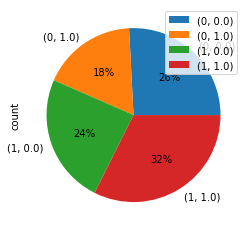

In [35]:

### Plotting Pie chart
### Here 0, 1 is not fire and fire respectively
### Here 0.0 and 1.0 is Bejaia region and Sidi Bel-abbes region respectively
plt.figure(figsize=(7,6))
data_pie.plot(kind='pie', y='Classes', autopct='%1.0f%%')

In [36]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
categorical_features

[]

In [37]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
numerical_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

<AxesSubplot:xlabel='Classes', ylabel='count'>

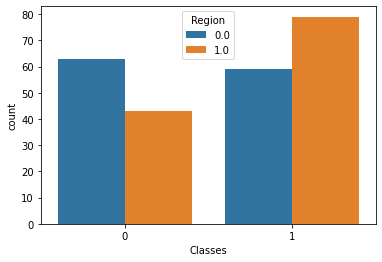

In [38]:
sns.countplot(data = dataset, x = 'Classes', hue = 'Region')

Sidi Bel-abbes region has more occurance of fire than Bejaia region

In [120]:
from pandas_profiling import ProfileReport

In [121]:
pf = ProfileReport(dataset)

In [122]:
pf.to_widgets()

In [39]:
dataset[numerical_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

## Segregating Continuous and Discrete Variables 

In [40]:
continuous_features = [feature for feature in numerical_features if dataset[feature].nunique() > 35]
continuous_features

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [41]:
discrete_features = [feature for feature in numerical_features if dataset[feature].nunique() < 35]
discrete_features

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

## Bivariate Analysis
Now plotting discrete_features and output feature (Classes)

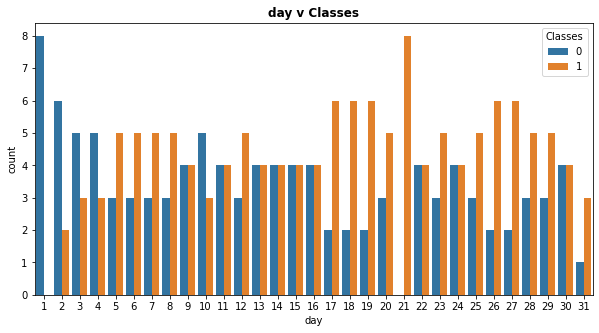

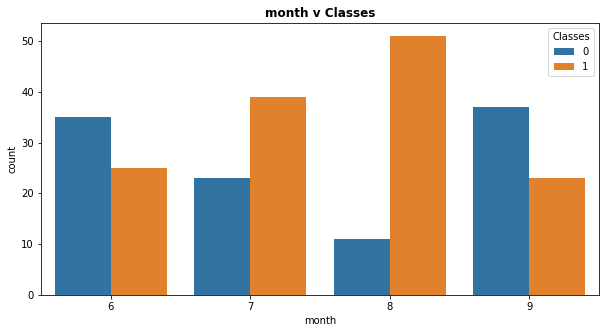

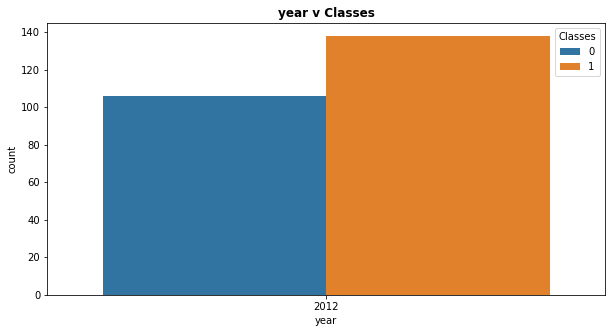

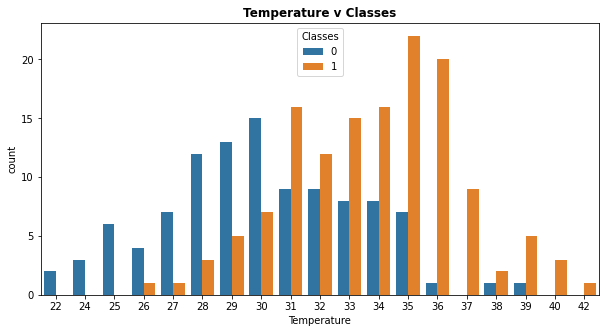

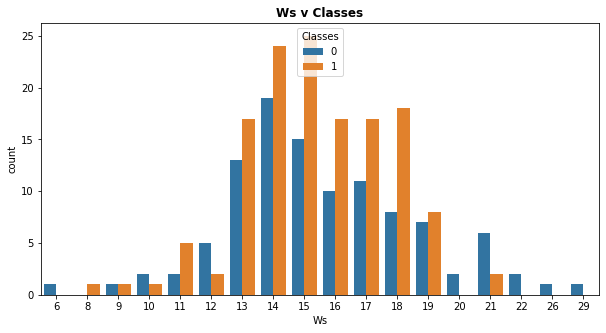

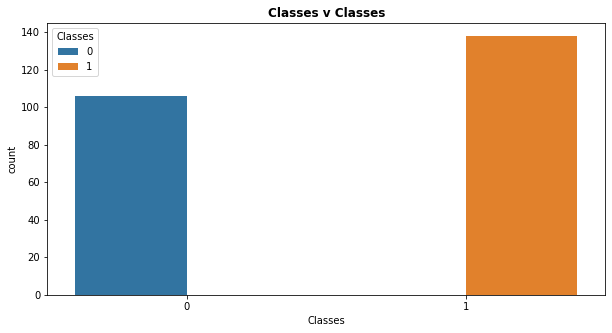

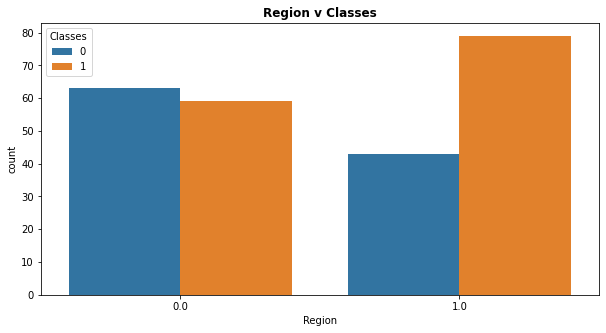

In [42]:
for features in discrete_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data = dataset, x = features, hue = 'Classes')
    plt.title(f'{features} v Classes',fontweight = 'bold')
    plt.show()

## Observations

- Most forest fires tend to occur in July and August 
- Windspeed is normally distributed with most forest fires happen due to moderate windspeed(13-19 km/h)
- Siddi Bel-abbes region is more prone to forest fires as compared to Bejaia region
- It is evident that with increase in temperature the chances of forest fires increase. Above 30 deg C there is spike in numbers of forest fire cases
- It is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of no fire cases

## Univariate Analysis

Analyzing distribution of different continuous features with the help of kde plot and histogram

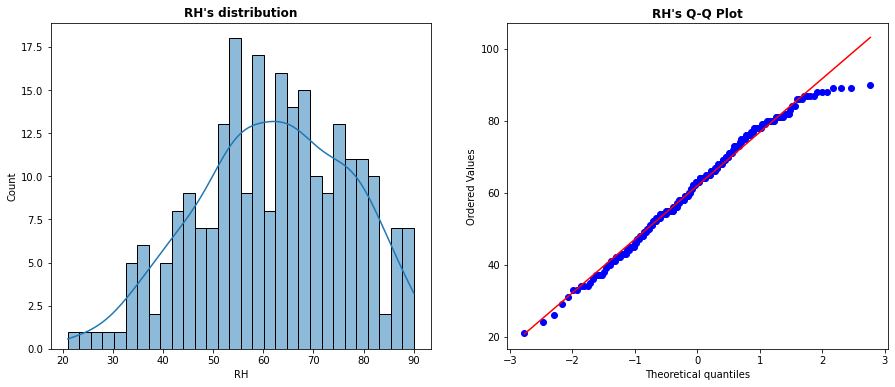

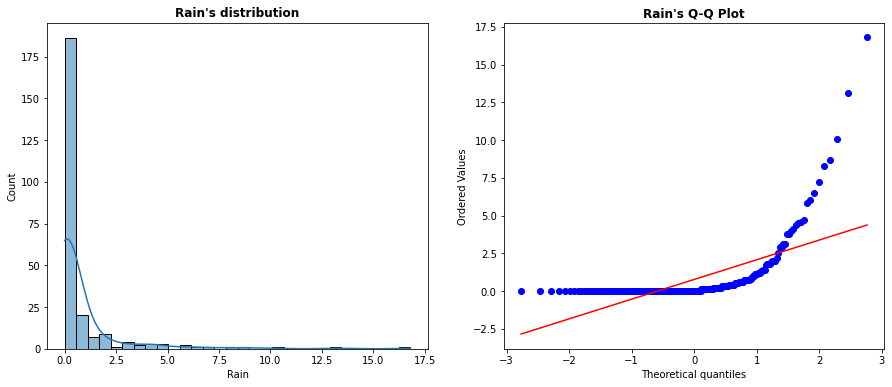

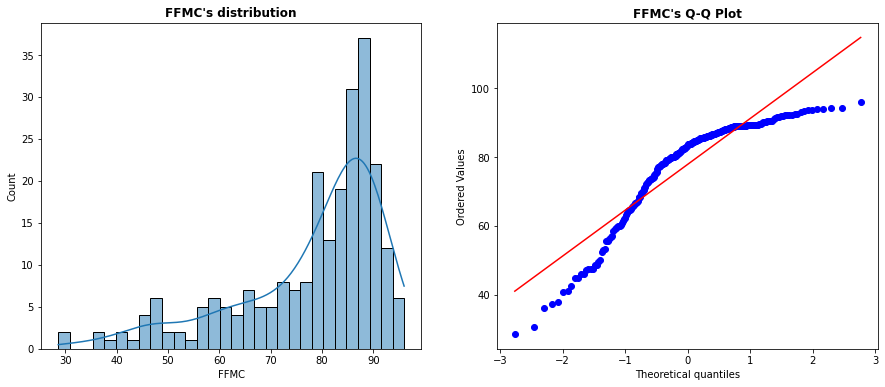

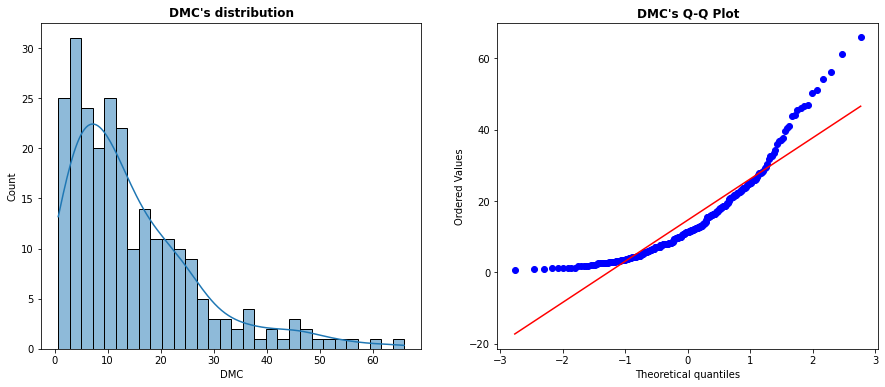

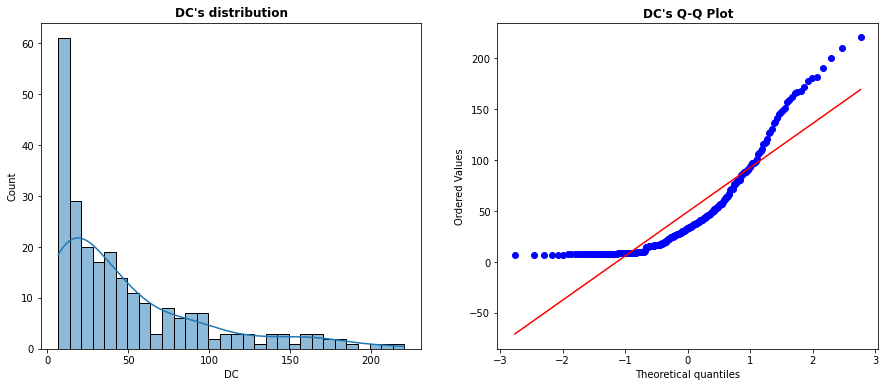

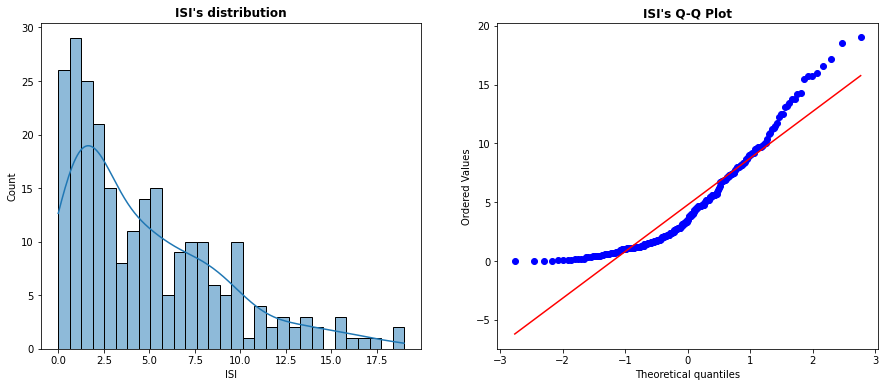

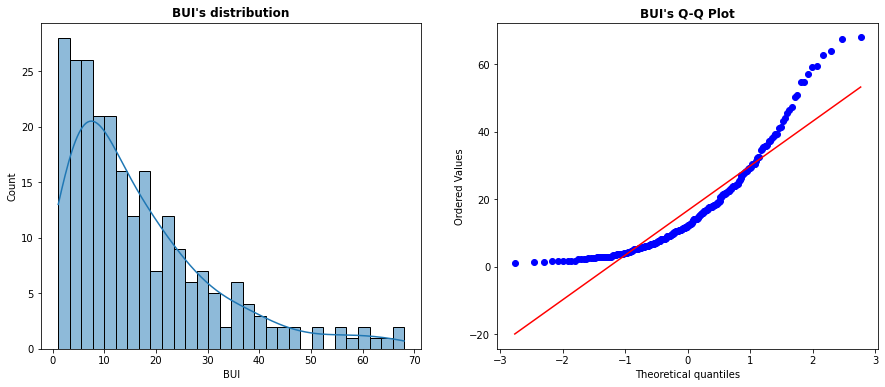

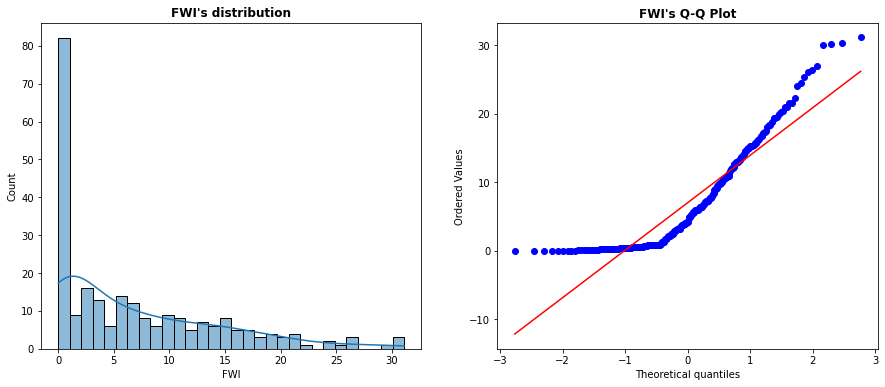

In [43]:
import scipy.stats as stats
for features in continuous_features:
    plt.figure(figsize =(15,6))
    plt.subplot(121) # 1 row and 2 columns and this curve is 1st chart
    sns.histplot(data = dataset, x = features, kde = True, bins = 30)
    plt.title(f"{features}'s distribution",fontweight = 'bold' )
    
    plt.subplot(122) # 1 row and 2 columns and this curve is 2nd chart
    stats.probplot(dataset[features],plot= plt)
    plt.title(f"{features}'s Q-Q Plot",fontweight = 'bold' )


## Observations:

- Relative humidity is somewhat normally distributed with marginally skewed towards left side
- Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution)
- FFMC feature follows left skewed distribution

### Comparing Continuous Numerical Features with Region

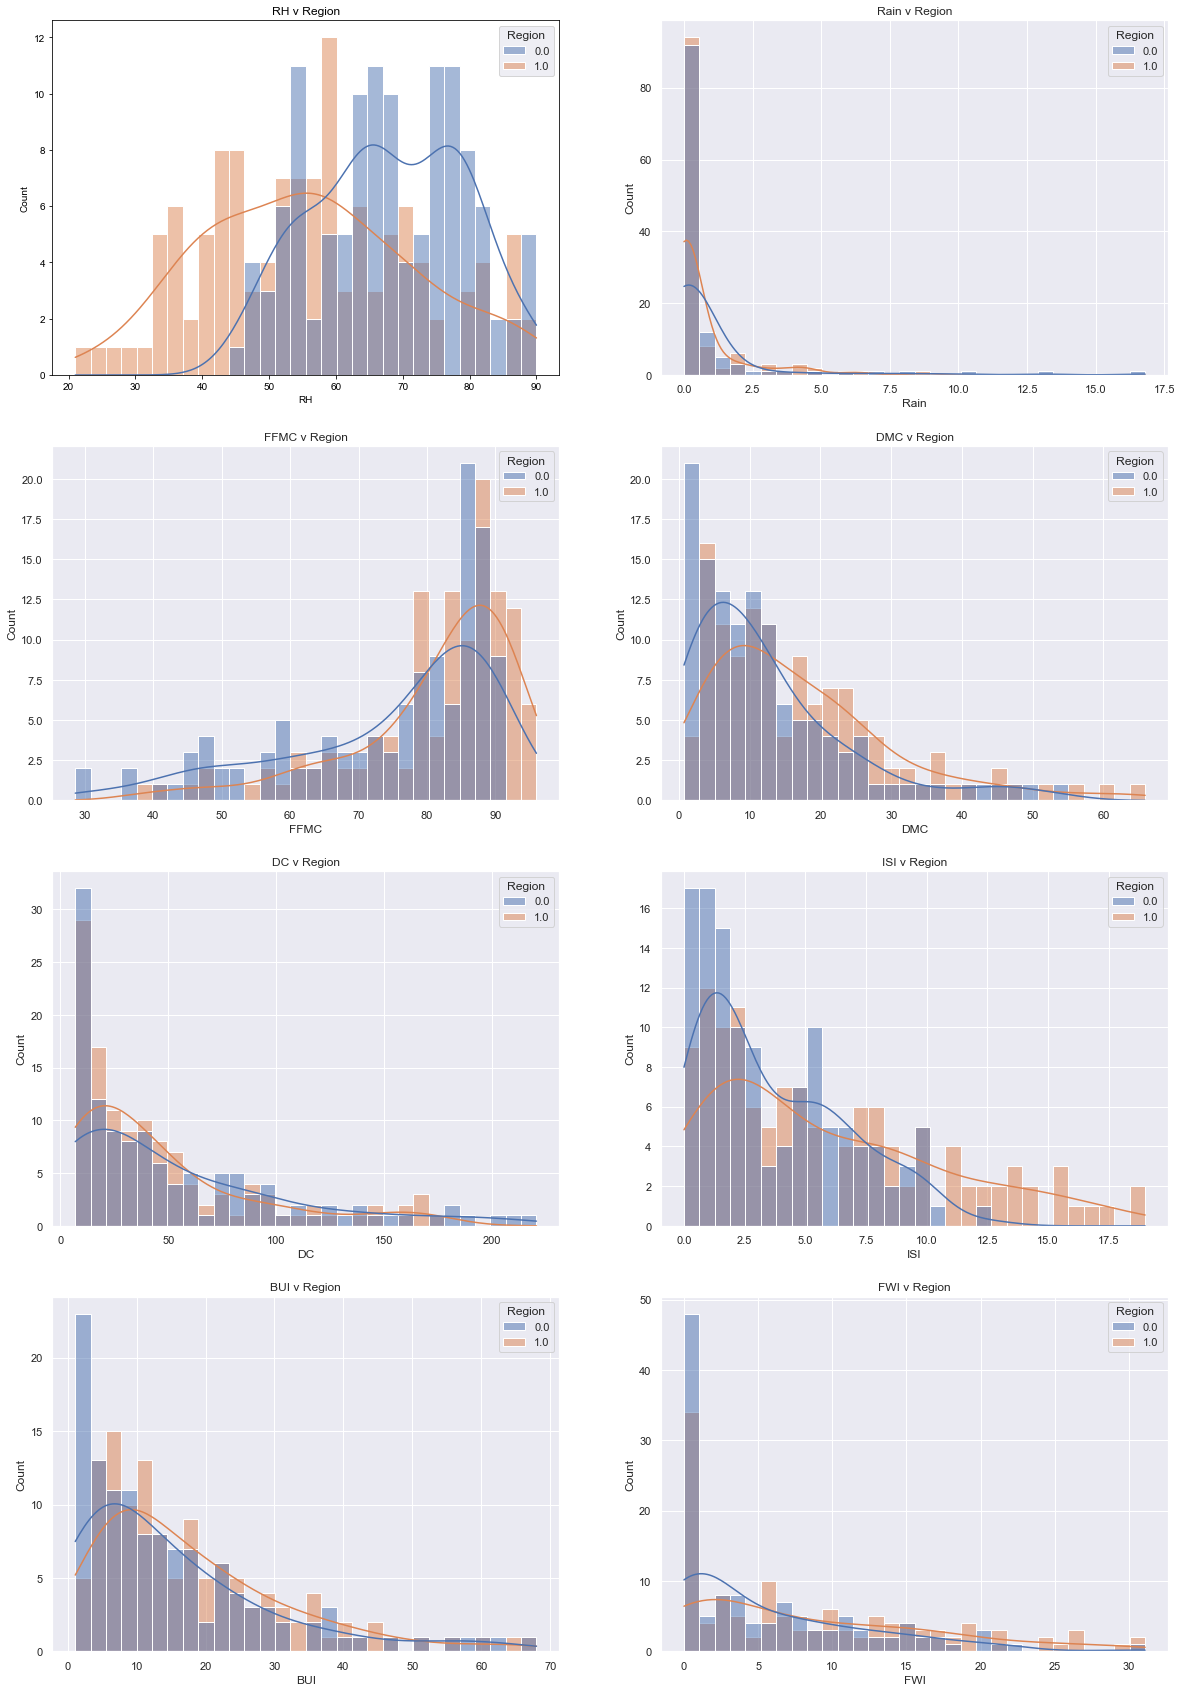

In [44]:
plt.figure(figsize=(20,30))
for idx in range(len(continuous_features)):
    plt.subplot(4,2,idx+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data = dataset, x = continuous_features[idx], kde = True, bins= 30, hue = 'Region')
    plt.xlabel(continuous_features[idx])
    plt.ylabel('Count')
    plt.title(f'{continuous_features[idx]} v Region', fontweight = True)


### Comparing Continuous Numerical Features with Classes

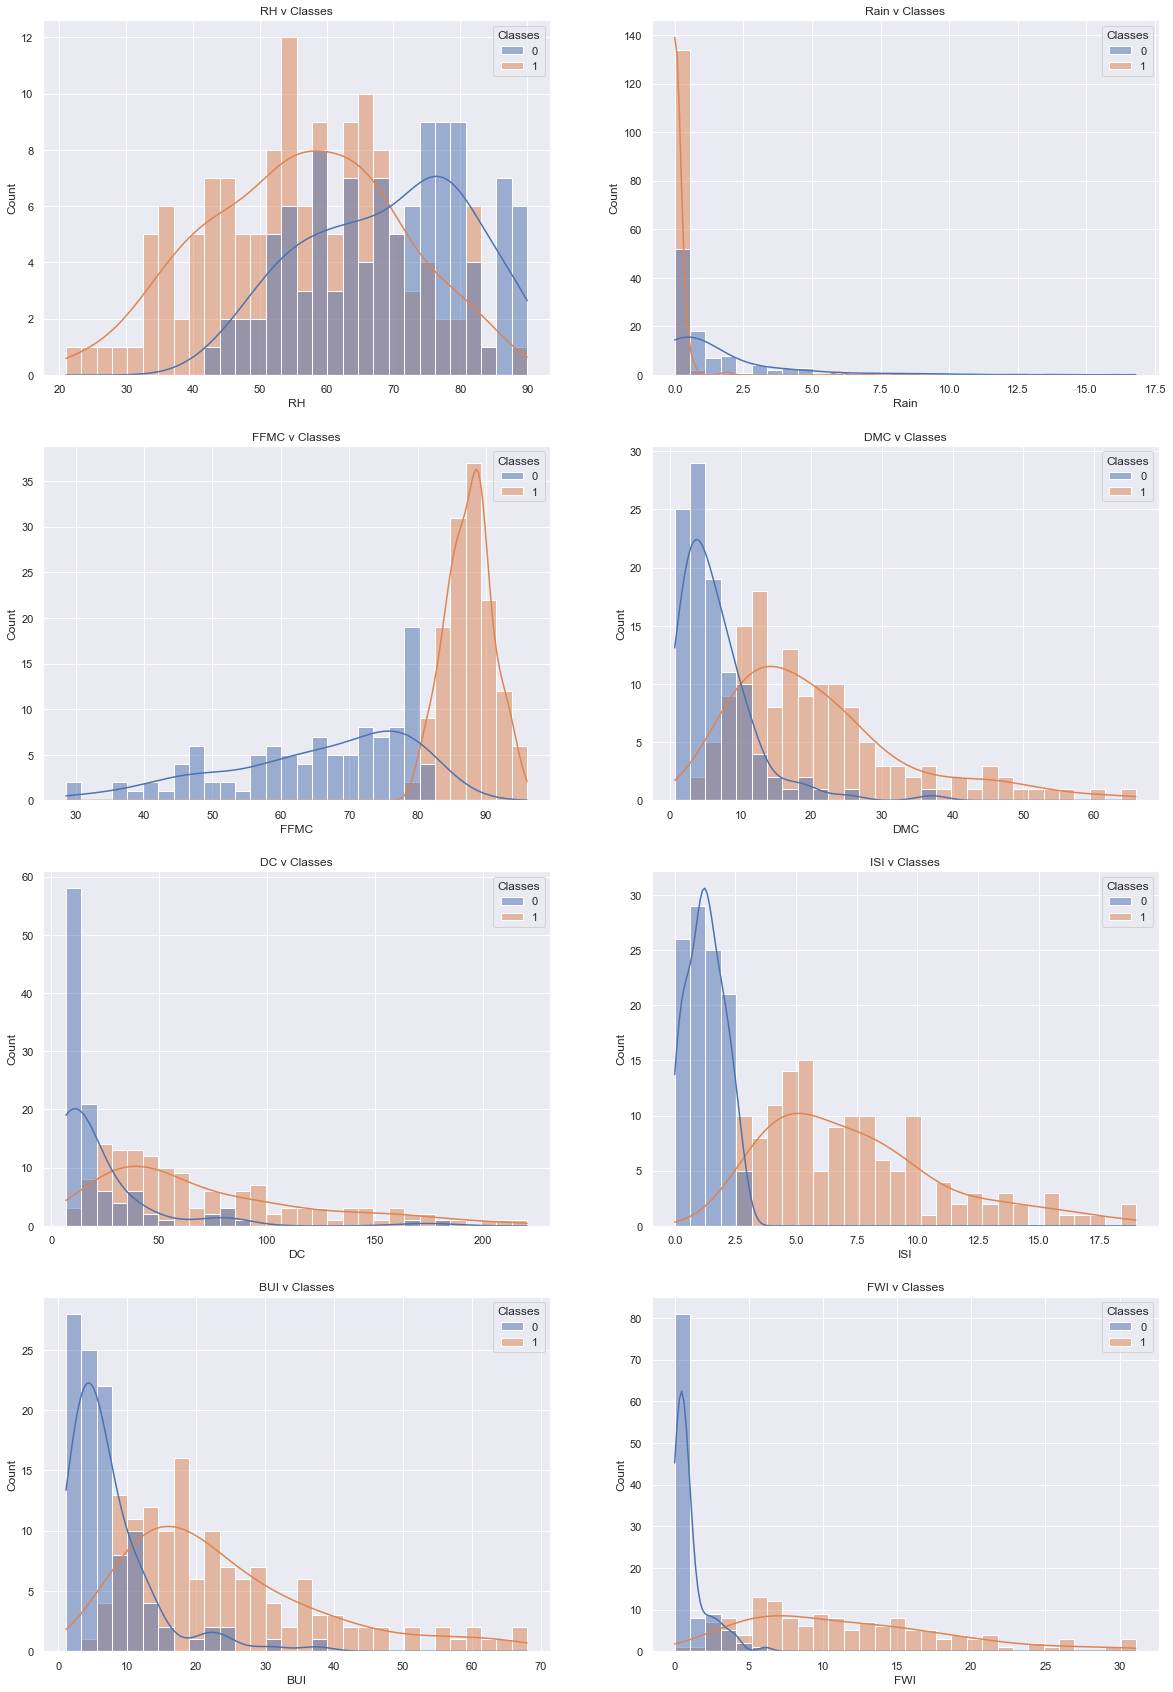

In [45]:
plt.figure(figsize=(20,30))
for idx in range(len(continuous_features)):
    plt.subplot(4,2,idx+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data = dataset, x = continuous_features[idx], kde = True, bins= 30, hue = 'Classes')
    plt.xlabel(continuous_features[idx])
    plt.ylabel('Count')
    plt.title(f'{continuous_features[idx]} v Classes', fontweight = True)

# 3. Detecting and Removing Outliers

In [46]:
numerical_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

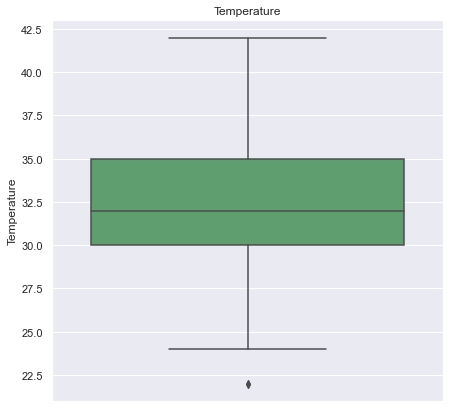

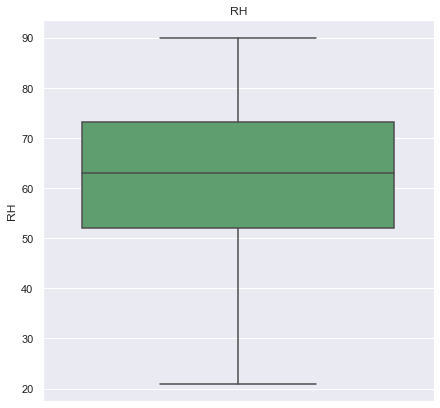

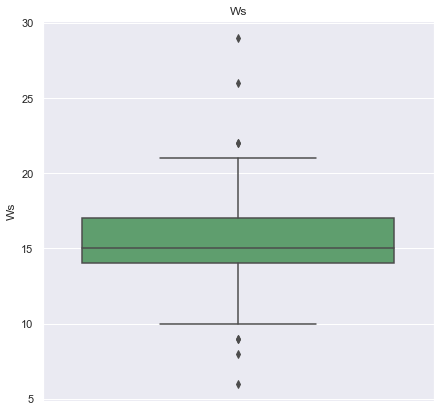

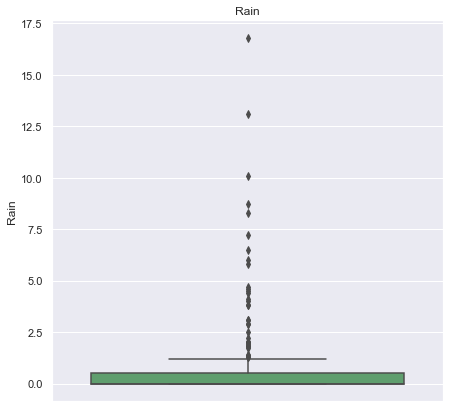

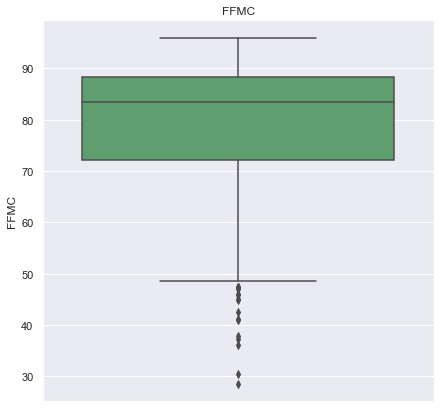

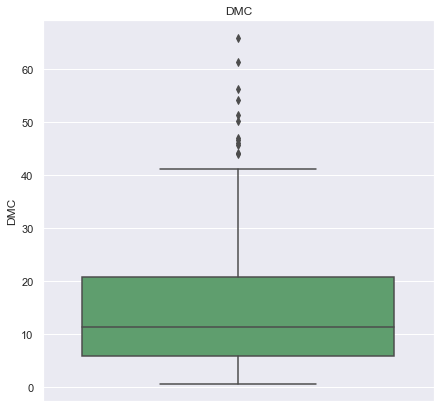

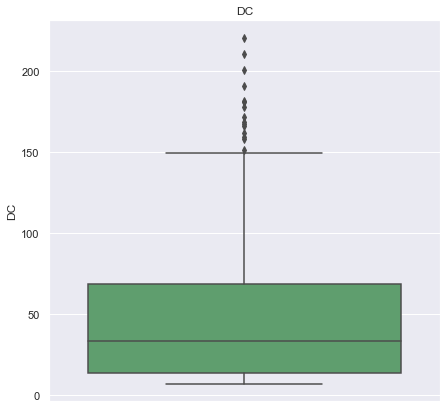

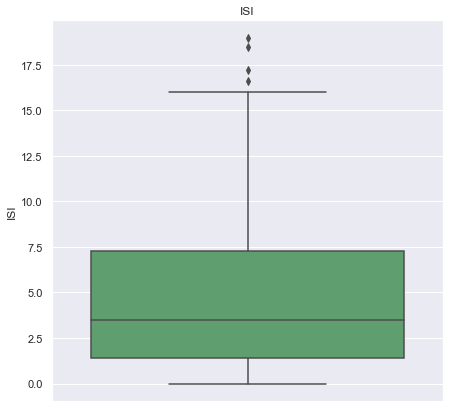

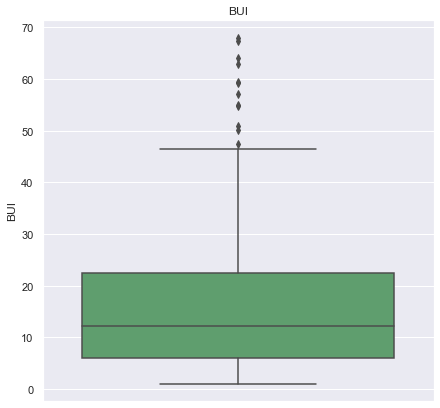

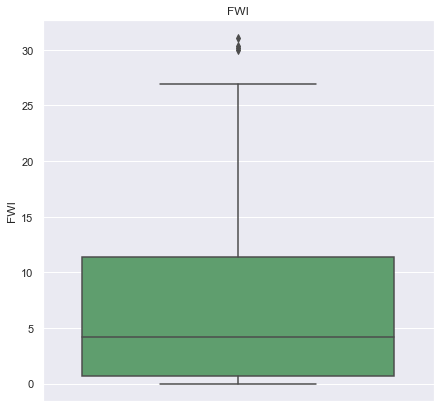

In [47]:
for feature in [feature for feature in numerical_features if feature not in ['day','month','year','Classes','Region']]:
    sns.boxplot(data = dataset, y = feature, color = 'g')
    plt.title(feature)
    plt.show()


## Observations
- Relative Humidity, RH feature doesnt have outliers
- Temperature and FFMC have outliers in lower boundary side
- Wind Speed, Ws has outliers on both sides(Upper and lower boundary)
- Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side

# 4. Correlation b/w Numerical Features

In [48]:
data = round(dataset[[feature for feature in numerical_features if feature not in ['day','month','year','Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


<AxesSubplot:>

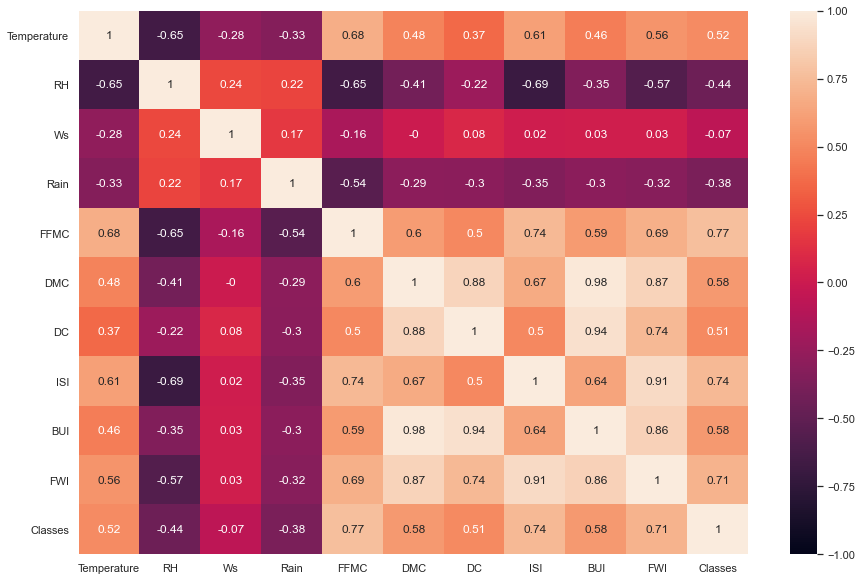

In [49]:
plt.figure(figsize = (15,10))

sns.heatmap(data = data, annot =True, vmin = -1, vmax = 1) # annot displays the values of correlation

## Note (For both positive and negative side)
- Correlation coefficients between 0.9 and 1.0, very highly correlated.
- Correlation coefficients between 0.7 and 0.9, highly correlated.
- Correlation coefficients between 0.5 and 0.7, moderately correlated.
- Correlation coefficients between 0.3 and 0.5, low correlation.
- Correlation coefficients less than 0.3, little correlation

## Observations
- Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
- Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
#### Note: Features with very high and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, we can drop one of the two features.

## 5.Studying Features v/s Target Features

### 5.1.For Logistic Regression

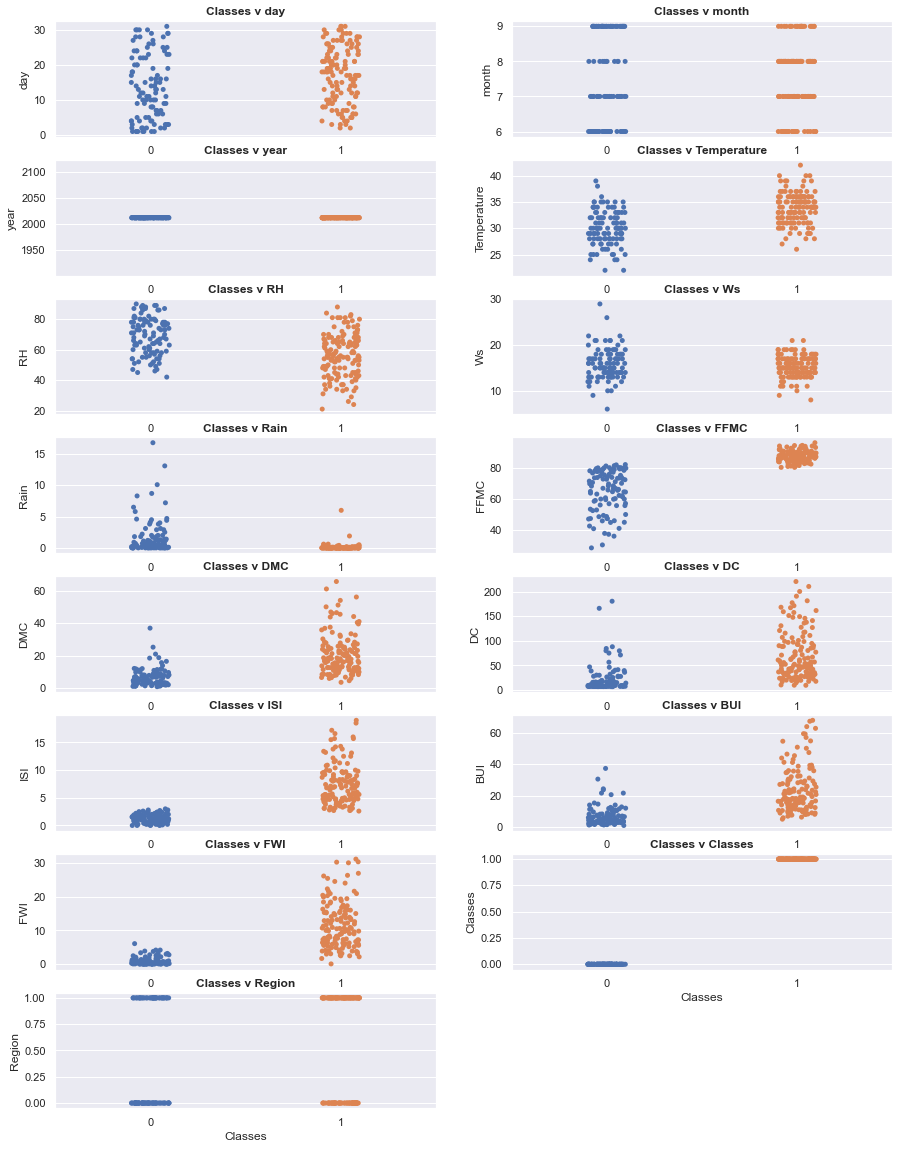

In [55]:
plt.figure(figsize=(15,20))
for idx in range(len(numerical_features)):
    plt.subplot(8,2,idx+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data = dataset, x = 'Classes', y = numerical_features[idx])
    plt.xlabel('Classes')
    plt.ylabel(numerical_features[idx])
    plt.title(f'Classes v {numerical_features[idx]}',fontweight = 'bold')    
                 
                 


## Observations:

- It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.
- For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.
- Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
- For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
- DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

## Final Report
- Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
- Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
- Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
- Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
- Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
- For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
- DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
- In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
- In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
- Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
- Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
- July and august have more cases of fire as compared to no fire.
- June and september have more cases of no fire as compared to fire.
- Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
- There is no null vales in dataset.
### Note EDA and basic feature engineering is done its time to seperate independent and dependent features.

- For demonstrating linear regression taking Temperature as Dependent feature.
- dropping year feature as dataset contains only 2012 year

In [56]:
dataset.drop('year', axis =1, inplace = True)

In [57]:
dataset.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [59]:
dataset['Class'] = dataset['Classes']
dataset.head(1)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Class
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,0


In [61]:
dataset.drop('Classes', axis = 1, inplace = True)

## 5. Starting Model Building Preperation 

### 5.1 Seperating Independent and Dependent Features

In [62]:

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [63]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [64]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Class, Length: 244, dtype: int64

### 2.0 Splitting data into Training and Test Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [67]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
234,21,9,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1.0
227,14,9,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1.0
180,29,7,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1.0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0.0
56,27,7,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3,0.0


In [68]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,25,6,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0
153,2,7,33,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0
211,29,8,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1.0
198,16,8,40,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1.0


In [69]:
y_train.head()

234    1
227    1
180    1
5      1
56     1
Name: Class, dtype: int64

In [70]:
y_test.head()

24     1
6      1
153    1
211    1
198    1
Name: Class, dtype: int64

### 3.0 Feature Standardization

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaler

StandardScaler()

In [73]:
### Using fit_transform to standardise Train data
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.60184833,  1.38495884,  0.7959066 , ...,  0.88897112,
         2.01522112,  0.98830369],
       [-0.18604992,  1.38495884, -1.07219765, ..., -0.16108818,
        -0.15443661,  0.98830369],
       [ 1.50230347, -0.40548224,  0.52903456, ...,  0.20052165,
         0.55513699,  0.98830369],
       ...,
       [-1.64928953,  1.38495884, -1.87281375, ..., -1.03034256,
        -0.91859279, -1.01183473],
       [ 1.38974657, -0.40548224,  0.26216253, ..., -0.06373169,
         0.29586971,  0.98830369],
       [-0.5237206 ,  1.38495884, -0.53845358, ..., -0.98861835,
        -0.89130149, -1.01183473]])

In [74]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
X_test = scaler.transform(X_test)
X_test

array([[ 1.05207590e+00, -1.30070279e+00, -2.71581542e-01,
         8.95559923e-02, -1.84965365e-01, -3.84926784e-01,
         6.55802741e-01, -3.45759694e-02,  3.00646149e-01,
         2.58796614e-01,  1.17073226e-01,  2.13995838e-01,
        -1.01183473e+00],
       [-9.73948170e-01, -1.30070279e+00,  2.62162529e-01,
        -5.90110020e-01, -9.42654810e-01, -3.84926784e-01,
         7.59299274e-01, -3.78922477e-01, -3.82486968e-01,
         4.26809691e-01, -3.97525370e-01,  5.02480850e-02,
        -1.01183473e+00],
       [-1.53673263e+00, -4.05482245e-01,  2.62162529e-01,
        -9.97909628e-01,  1.93879358e-01, -3.84926784e-01,
         7.17900661e-01, -5.39083644e-01, -6.43021220e-01,
         5.22817163e-01, -6.13100458e-01, -5.89170837e-02,
         9.88303691e-01],
       [ 1.50230347e+00,  4.89738296e-01,  7.95906599e-01,
        -6.58076622e-01,  5.72724081e-01, -1.57080150e-01,
         2.07317762e-01,  4.85947821e-01,  2.05258513e+00,
        -4.61259431e-01,  9.72419541e

# 6. Model Building

## 1. Linear Regression

In [76]:
logistic_reg = LogisticRegression()

In [77]:
logistic_reg.fit(X_train,y_train)

LogisticRegression()

## 1.1 Using model to get predictions of test data

In [79]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## 1.2 Performance Matrix
#### 1.2.1 Confusion Matrix


In [81]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[27,  0],
       [ 2, 45]], dtype=int64)

In [82]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

#### 1.2.2 Accuracy Score

In [83]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.973

In [84]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.973


In [85]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.96      0.98        47

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74

